# Thresholding

Histogram equalization helps in image thresholding and segementation. It serves as one of the key pre-processing steps.

Images which has low contrast or washed type can be enhanced using histogram equalization. Bighter pixels get more bright and darker pixel gets more dark.

Histogram equalization is a good way to stretch the histogram and thus improve the image.  

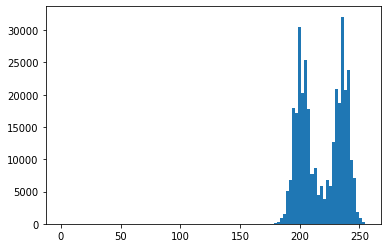

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("images/Alloy.jpg", 0)
equ = cv2.equalizeHist(img)

plt.hist(img.flat,bins=100,range=(0,255))
plt.show()

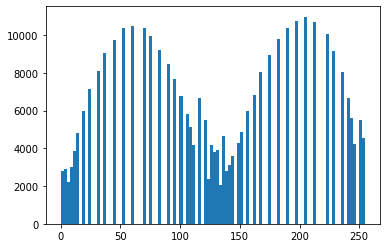

In [5]:
plt.hist(equ.flat, bins=100, range=(0,255))
plt.show()

In [4]:
cv2.imshow("Original Image", img)
cv2.imshow("Equalized", equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

Histogram Equalization considers the global contrast of the image, may not give good results.
**Adaptive histogram equalization** divides images into small tiles and performs hist. eq. Contrast limiting is also applied to minimize aplification of noise. Together the algorithm is called: **Contrast Limited Adaptive Histogram Equalization (CLAHE)**

In [6]:
# Start by creating a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
cl1 = clahe.apply(img)

cv2.imshow("Original Image", img)
cv2.imshow("Equalized", equ)
cv2.imshow("CLAHE", cl1)
cv2.waitKey(0)          
cv2.destroyAllWindows() 
cv2.waitKey(0)
cv2.destroyAllWindows()

---

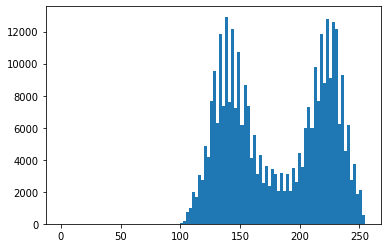

In [8]:
#Image thresholding

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/Alloy.jpg", 0)

#Adaptive histogram equalization using CLAHE to stretch the histogram. 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)
plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()

 **Thresholding** creates a uint8 image but with binary values.

We can use this image to further segment. so we can say that threshodling the process prior to image segmentation.

1. First argument is the source image, which should be a grayscale image.
2. Second argument is the threshold value which is used to classify the pixel values. 
3. Third argument is the maxVal which represents the value to be given to the thresholded pixel.

In [9]:
ret,thresh1 = cv2.threshold(clahe_img,185,150,cv2.THRESH_BINARY)  #All thresholded pixels in grey = 150
ret,thresh2 = cv2.threshold(clahe_img,185,255,cv2.THRESH_BINARY_INV) # All thresholded pixels in white

cv2.imshow("Original", img)
cv2.imshow("Binary thresholded", thresh1)
cv2.imshow("Inverted Binary thresholded", thresh2)
cv2.waitKey(0)          
cv2.destroyAllWindows() 

---

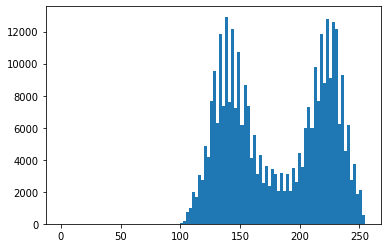

In [10]:
#OTSU Thresholding, binarization
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/Alloy.jpg", 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
clahe_img = clahe.apply(img)

plt.hist(clahe_img.flat, bins =100, range=(0,255))
plt.show()

In [11]:
# binary thresholding
ret1,th1 = cv2.threshold(clahe_img,185,200,cv2.THRESH_BINARY)

# Otsu's thresholding, automatically finds the threshold point. 
#Compare wth above value provided by us (185)
ret2,th2 = cv2.threshold(clahe_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


cv2.imshow("Otsu", th2)
cv2.waitKey(0)          
cv2.destroyAllWindows() 

- If working with noisy images, clean up noise for better thresholding

- Otsu's thresholding after Gaussian filtering. Can use median or NLM for beteer edge preserving

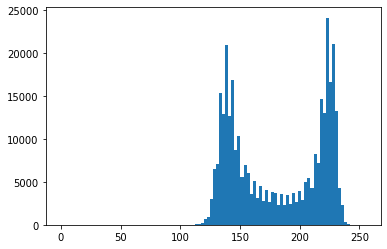

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/Alloy_noisy.jpg", 0)

blur = cv2.GaussianBlur(clahe_img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.hist(blur.flat, bins =100, range=(0,255))
plt.show()

In [13]:
cv2.imshow("OTSU Gaussian cleaned", th3)
cv2.waitKey(0)          
cv2.destroyAllWindows() 